In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from scipy.optimize import curve_fit
import importlib
from cycler import cycler
from matplotlib.ticker import MultipleLocator
from pathlib import Path
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\kearb\\Documents\\GitHub\\Python Projects\\AdvLabs\\Lab 3\\utils.py'>

In [12]:
# Load data
# ------------------------------------------------------------------
# 1 · load the background once
# ------------------------------------------------------------------
bkg = utils.load_scan("Data/unk_18_bg.txt")          # rows = Mass values

data_dict = {}

path = 'Data/unk_18.txt'
df = utils.load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Unknown 18'] = df.reset_index()   # back to columns if you prefer

bkg = utils.load_scan("Data/unk_4_bg.txt")
path = 'Data/unk_4.txt'
df = utils.load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Unknown 4'] = df.reset_index()   # back to columns if you prefer


bkg = utils.load_scan("Data/cyclo_bg.txt")          # rows = Mass values

path = 'Data/Cyclo_data.txt'
df = utils.load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Cyclohexane'] = df.reset_index()   # back to columns if you prefer



In [5]:
max_value = 0
for key, data in data_dict.items():
    temp_max = data['Pressure (uncorrected)'].max()
    if temp_max > max_value:
        max_value = temp_max

    intensity = data['Pressure (uncorrected)'] / max_value * 100  # Normalize to percentage
    data_dict[key]['Intensity'] = intensity

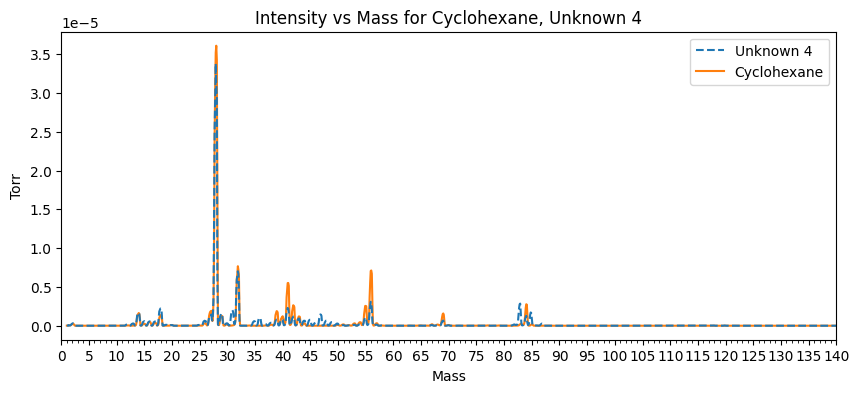

In [ ]:

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data_dict['Unknown 4']['Mass'], data_dict['Unknown 4']['Intensity'], '--', label='Unknown 4', zorder=2)
ax.plot(data_dict['Cyclohexane']['Mass'], data_dict['Cyclohexane']['Intensity'], label='Cyclohexane', zorder=1)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.legend()
#    ax.axvline(x=2,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=28,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=42,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
ax.set_xlim(0, 140)
ax.set(xlabel='Mass', ylabel='Torr', title=f'Intensity vs Mass for Cyclohexane, Unknown 4')
plt.show()

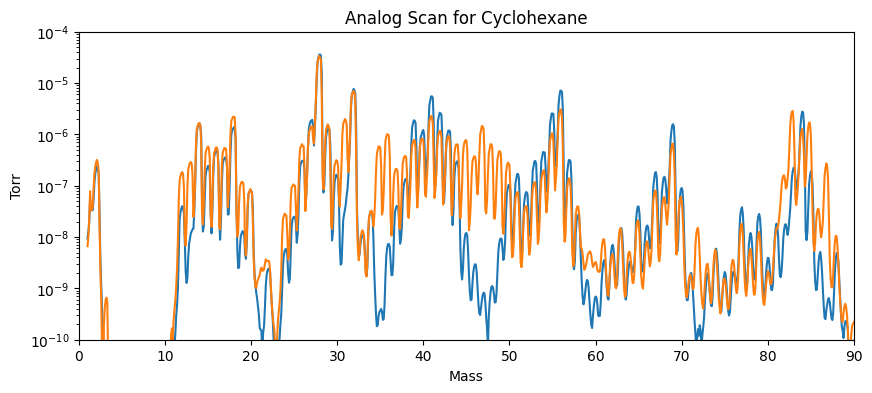

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
#     ax.axvline(x=2,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
#     ax.axvline(x=28,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
ax.set_ylim(bottom=1e-10, top=1e-4)
ax.set_xlim(0, 90)
ax.set_yscale('log')
ax.plot(data_dict['Cyclohexane']['Mass'], data_dict['Cyclohexane']['Pressure (uncorrected)'])
ax.plot(data_dict['Unknown 4']['Mass'], data_dict['Unknown 4']['Pressure (uncorrected)'])
ax.set(xlabel='Mass', ylabel='Torr', title=f'Analog Scan for {key}')
plt.show()

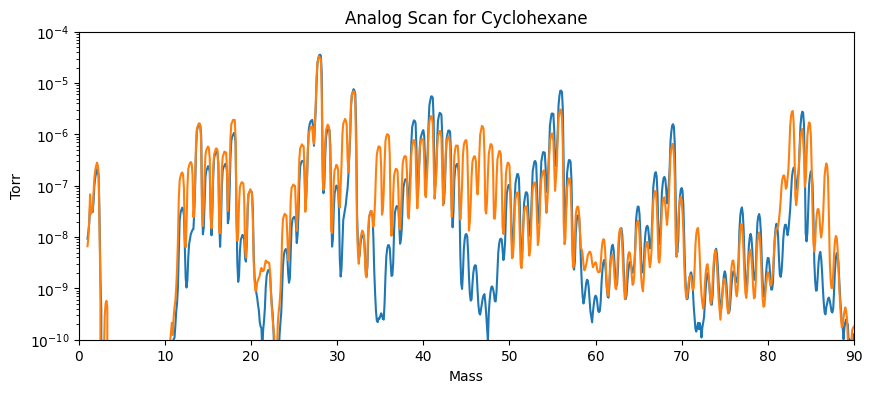

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
#     ax.axvline(x=2,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
#     ax.axvline(x=28,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
ax.set_ylim(bottom=1e-10, top=1e-4)
ax.set_xlim(0, 90)
ax.set_yscale('log')
ax.plot(data_dict['Cyclohexane']['Mass'], data_dict['Cyclohexane']['Pressure (torr)'])
ax.plot(data_dict['Unknown 4']['Mass'], data_dict['Unknown 4']['Pressure (torr)'])
ax.set(xlabel='Mass', ylabel='Torr', title=f'Analog Scan for {key}')
plt.show()

In [36]:
data_dict['Leftover']['Pressure (torr)'] = data_dict['Unknown 4']['Pressure (torr)'] - data_dict['Cyclohexane']['Pressure (torr)']
data_dict['Leftover']['Pressure (torr)'] = data_dict['Leftover']['Pressure (torr)'].clip(lower=1e-7)
data_dict['Leftover']['Mass'] = data_dict['Unknown 4']['Mass'].copy()


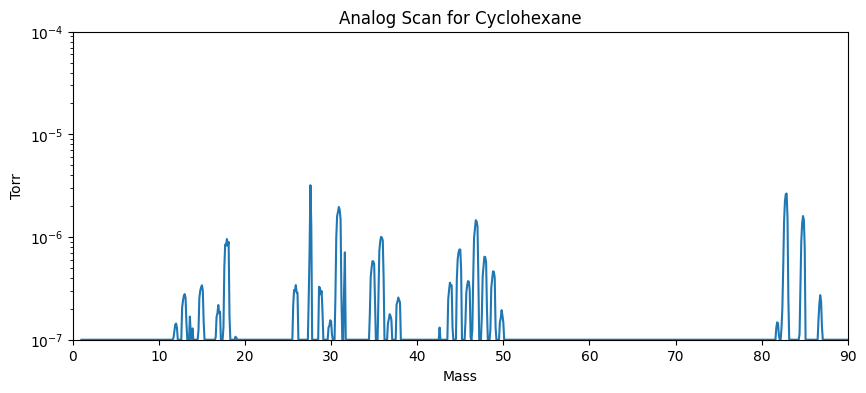

In [38]:
fig, ax = plt.subplots(figsize=(10, 4))
#     ax.axvline(x=2,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
#     ax.axvline(x=28,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
ax.set_ylim(bottom=1e-7, top=1e-4)
ax.set_xlim(0, 90)
ax.set_yscale('log')
ax.plot(data_dict['Leftover']['Mass'], data_dict['Leftover']['Pressure (torr)'])
ax.set(xlabel='Mass', ylabel='Torr', title=f'Analog Scan for {key}')
plt.show()

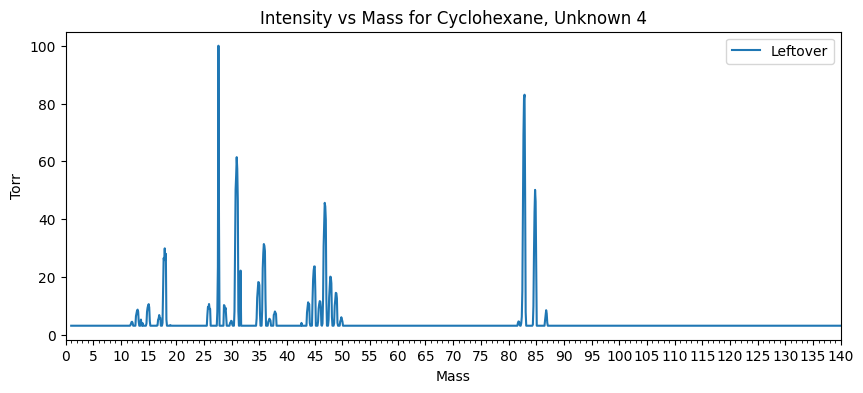

In [39]:
data_dict['Leftover']['Intensity'] = data_dict['Leftover']['Pressure (torr)'] / data_dict['Leftover']['Pressure (torr)'].max() * 100
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data_dict['Leftover']['Mass'], data_dict['Leftover']['Intensity'], label='Leftover', zorder=2)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.legend()
#    ax.axvline(x=2,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=28,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=42,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
ax.set_xlim(0, 140)
ax.set(xlabel='Mass', ylabel='Torr', title=f'Intensity vs Mass for Cyclohexane, Unknown 4')
plt.show()

In [44]:
idx_max = data_dict['Leftover']['Intensity'].idxmax()
print(data_dict['Leftover'].loc[idx_max])

Mass                       27.600000
Pressure (uncorrected)      0.000003
Pressure (torr)             0.000003
Intensity                 100.000000
Name: 266, dtype: float64


In [48]:
peaks_leftover, peaks_mass_leftover = utils.find_peaks(data_dict['Leftover'], cutoff=4, interval=1.5)

    Mass   Intensity
0   12.0    4.493121
1   13.0    8.694997
2   13.6    5.251094
3   15.0   10.597874
4   16.9    6.807380
5   17.9   29.893684
6   25.9   10.629143
7   27.4    7.917448
8   27.6  100.000000
9   28.6   10.261413
10  29.9    4.834271
11  30.9   61.442151
12  31.6   22.191995
13  34.8   18.217917
14  35.8   31.389212
15  36.8    5.538934
16  37.8    8.059318
17  42.6    4.107880
18  43.8   11.235147
19  44.9   23.640119
20  45.9   11.638440
21  46.8   45.633784
22  47.8   20.109675
23  48.8   14.496245
24  49.8    6.061382
25  82.4    6.198071
26  82.9   83.047498
27  84.8   50.121951
28  86.8    8.490816


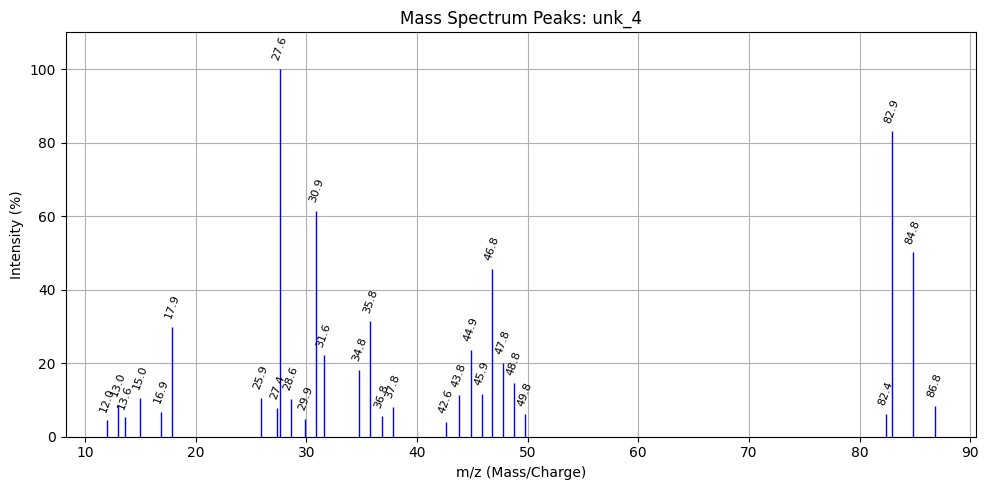

In [49]:
leftover_peaks_df = pd.DataFrame({
    'Mass': peaks_mass_leftover,
    'Intensity': peaks_leftover
})
print(leftover_peaks_df)

# Assume leftover_peaks_df has columns "Mass" and "Intensity"
fig, ax = plt.subplots(figsize=(10, 5))

# Plot vertical lines
for _, row in leftover_peaks_df.iterrows():
    ax.vlines(x=row["Mass"], ymin=0, ymax=row["Intensity"], color='blue', linewidth=1)

for m, I in zip(peaks_mass_leftover, peaks_leftover):
    ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
        xy=(m, I),           # point to annotate
        xytext=(0, 5),       # (x-offset, y-offset) in points
        textcoords='offset points',
        ha='center',         # horizontal alignment
        va='bottom',         # vertical alignment
        fontsize=8,
        rotation=70)         # slanted like your sample

# Customize plot
ax.set_xlabel("m/z (Mass/Charge)")
ax.set_ylabel("Intensity (%)")
ax.set_title("Mass Spectrum Peaks: unk_4")
ax.set_ylim(0, 110)  # Adjust if needed
ax.grid(True)

plt.tight_layout()
plt.show()

    Mass   Intensity
0   15.0   10.597874
1   17.9   29.893684
2   25.9   10.629143
3   27.6  100.000000
4   28.6   10.261413
5   30.9   61.442151
6   31.6   22.191995
7   34.8   18.217917
8   35.8   31.389212
9   43.8   11.235147
10  44.9   23.640119
11  45.9   11.638440
12  46.8   45.633784
13  47.8   20.109675
14  48.8   14.496245
15  82.9   83.047498
16  84.8   50.121951


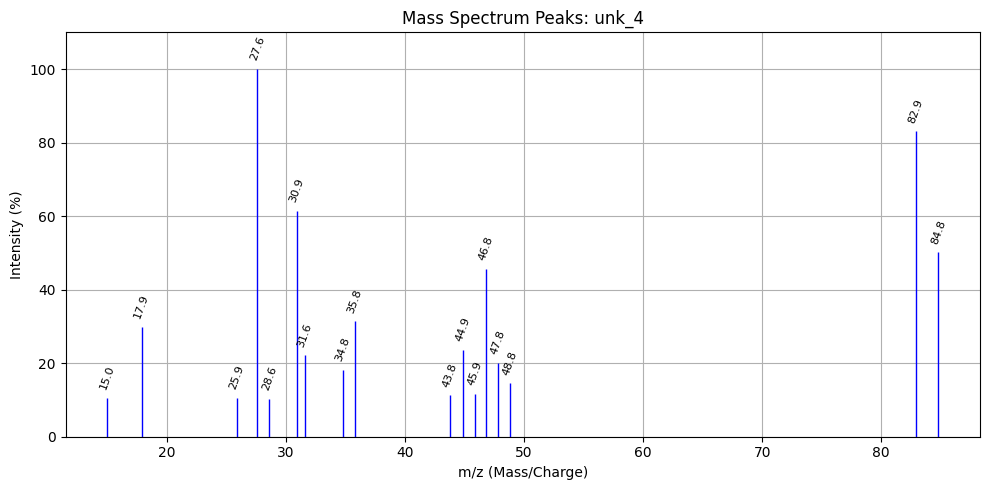

In [50]:
peaks_leftover_2, peaks_mass_leftover_2 = utils.find_peaks(data_dict['Leftover'], cutoff=10, interval=1.5)
leftover_peaks_2_df = pd.DataFrame({
    'Mass': peaks_mass_leftover_2,
    'Intensity': peaks_leftover_2
})
print(leftover_peaks_2_df)

# Assume leftover_peaks_2_df has columns "Mass" and "Intensity"
fig, ax = plt.subplots(figsize=(10, 5))

# Plot vertical lines
for _, row in leftover_peaks_2_df.iterrows():
    ax.vlines(x=row["Mass"], ymin=0, ymax=row["Intensity"], color='blue', linewidth=1)

for m, I in zip(peaks_mass_leftover_2, peaks_leftover_2):
    ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
        xy=(m, I),           # point to annotate
        xytext=(0, 5),       # (x-offset, y-offset) in points
        textcoords='offset points',
        ha='center',         # horizontal alignment
        va='bottom',         # vertical alignment
        fontsize=8,
        rotation=70)         # slanted like your sample

# Customize plot
ax.set_xlabel("m/z (Mass/Charge)")
ax.set_ylabel("Intensity (%)")
ax.set_title("Mass Spectrum Peaks: unk_4")
ax.set_ylim(0, 110)  # Adjust if needed
ax.grid(True)

plt.tight_layout()
plt.show()